In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/24-1/Data Science/new_df.csv')
df.head()

,Unnamed: 0,job_id,company_id,speciality,company_size,industry,skill
0,0,3757940104,553718,digital hearing instrument behind ear ear open...,5,retail,other
1,1,3757754488,553718,digital hearing instrument behind ear ear open...,5,retail,health care provider
2,2,3757940025,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing,management manufacturing
3,3,3757934539,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing,management manufacturing
4,4,3757938019,474443,roller chain engineering class chain sprocket ...,4,automation machinery manufacturing,engineering


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df

,job_id,company_id,speciality,company_size,industry,skill
0,3757940104,553718,digital hearing instrument behind ear ear open...,5,retail,other
1,3757754488,553718,digital hearing instrument behind ear ear open...,5,retail,health care provider
2,3757940025,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing,management manufacturing
3,3757934539,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing,management manufacturing
4,3757938019,474443,roller chain engineering class chain sprocket ...,4,automation machinery manufacturing,engineering
...,...,...,...,...,...,...
24544,1657978824,89350959,midjourney ai prompt engineering chatgpt opena...,2,fine art,other
24545,1494619053,10696333,elevator stairlifts wheelchair lift dumbwaiter,2,medical equipment manufacturing,accounting finance
24546,1004740969,882349,residential foundation design residential fram...,2,architecture planning,engineering information technology
24547,903408693,3894635,pecan nut candy cake dry fruit gift basets cor...,2,retail,administration


Done Tokenize, Lemmatizie, Deleted Specials, Made them all Lower case ....

In [ ]:
# Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

Aimed to Try !<br>
By Using ColumnTransformer, a library from Scikit-Learn, is easier to preprocess each column.<br>
Also Enable to process various types of Data<br>
(e.g. Numerical, Categorical, etc..)<br><br>

**The Form of ColumnTransFormer:**


In [ ]:
'''
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ('name', transformer, columns)
    ]
)
'''

---

## **1st Trial**

* Industry(Target): None<br>
* Speciality, Skill(Features): OneHot<br>
* Company Size(Feature): None

In [ ]:
# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', OneHotEncoder(handle_unknown='ignore'), ['speciality']),
        ('skill', OneHotEncoder(handle_unknown='ignore'), ['skill']),  # Added the column name 'skill'
        ('company_size', 'passthrough', ['company_size'])
    ])

In [ ]:
# Prepare the features and target variable
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Define models
svm_model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('scaler', StandardScaler(with_mean=False)),
           ('classifier', SVC())])

decisionTree_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

randomForest_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [ ]:
# Split Data(Test Size: 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model by using Pipeline
svm_model.fit(X_train, y_train)
decisionTree_model.fit(X_train, y_train)
randomForest_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('speciality',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['speciality']),
                                                 ('skill',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['skill']),
                                                 ('company_size', 'passthrough',
                                                  ['company_size'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Predict by Using Test Data
y_pred_svm = svm_model.predict(X_test)
y_pred_decisionTree = decisionTree_model.predict(X_test)
y_pred_randomForest = randomForest_model.predict(X_test)

# Accuracy
accuracy_svm = svm_model.score(X_test, y_test)
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_randomForest = randomForest_model.score(X_test, y_test)

# Precision
# precision

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Decision Tree Accuracy: {accuracy_decisionTree:.2f}")
print(f"Random Forest Accuracy: {accuracy_randomForest:.2f}")

SVM Accuracy: 0.77
Decision Tree Accuracy: 0.71
Random Forest Accuracy: 0.72


1st Trial:<br>
SVM Accuracy: 0.77<br>
Decision Tree Accuracy: 0.71<br>
Random Forest Accuracy: 0.72<br>

##**2nd Trial**

* Industry(Target): Label Encoding
* Speciality, Skill(Features): TF-IDF Vectorizer
* Company Size(Feature): None

In [ ]:
# Encode Industry
label_encoder = LabelEncoder()
df['industry_encoded'] = label_encoder.fit_transform(df['industry'])

# Vectorize 'speciality' && 'skill' (TF-IDF)
tfidf_spec = TfidfVectorizer()
tfidf_skill = TfidfVectorizer()

# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', tfidf_spec, 'speciality'),
        ('skill', tfidf_skill, 'skill'),  # Added the column name 'skill'
        ('company_size', 'passthrough', ['company_size'])
    ])

In [ ]:
# Prepare the features and target variable
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Define models
svm_model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('scaler', StandardScaler(with_mean=False)),
           ('classifier', SVC())])

decisionTree_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

randomForest_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [ ]:
# Split Data(Test Size: 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model by using Pipeline
svm_model.fit(X_train, y_train)
decisionTree_model.fit(X_train, y_train)
randomForest_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('speciality',
                                                  TfidfVectorizer(),
                                                  'speciality'),
                                                 ('skill', TfidfVectorizer(),
                                                  'skill'),
                                                 ('company_size', 'passthrough',
                                                  ['company_size'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Predict by Using Test Data
y_pred_svm = svm_model.predict(X_test)
y_pred_decisionTree = decisionTree_model.predict(X_test)
y_pred_randomForest = randomForest_model.predict(X_test)

In [ ]:
# Predict by Using Test Data
y_pred_svm = svm_model.predict(X_test)
y_pred_decisionTree = decisionTree_model.predict(X_test)
y_pred_randomForest = randomForest_model.predict(X_test)

# Accuracy
accuracy_svm = svm_model.score(X_test, y_test)
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_randomForest = randomForest_model.score(X_test, y_test)

# Precision
# precision

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Decision Tree Accuracy: {accuracy_decisionTree:.2f}")
print(f"Random Forest Accuracy: {accuracy_randomForest:.2f}")

SVM Accuracy: 0.78
Decision Tree Accuracy: 0.83
Random Forest Accuracy: 0.87


**K-Fold Validation**

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm_model, X, y, cv=kf)
dt_scores = cross_val_score(decisionTree_model, X, y, cv=kf)
rf_scores = cross_val_score(randomForest_model, X, y, cv=kf)

# Ensemble Model
ensemble_model = VotingClassifier(
    estimators=[('svm', svm_model), ('dt', decisionTree_model), ('rf', randomForest_model)],
    voting='hard'
)
ensemble_scores = cross_val_score(ensemble_model, X, y, cv=kf)

# Print results
print(f"SVM Accuracy: {np.mean(svm_scores):.4f} ± {np.std(svm_scores):.4f}")
print(f"Decision Tree Accuracy: {np.mean(dt_scores):.4f} ± {np.std(dt_scores):.4f}")
print(f"Random Forest Accuracy: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}")
print(f"Ensemble Accuracy: {np.mean(ensemble_scores):.4f} ± {np.std(ensemble_scores):.4f}")

SVM Accuracy: 0.7840 ± 0.0055
Decision Tree Accuracy: 0.8330 ± 0.0068
Random Forest Accuracy: 0.8697 ± 0.0052
Ensemble Accuracy: 0.8590 ± 0.0059


2nd Trial:<br>
SVM Accuracy: 0.78<br>
Decision Tree Accuracy: 0.83<br>
Random Forest Accuracy: 0.87<br>

K-Fold && Ensemble:<br>
SVM Accuracy: 0.7840 ± 0.0055<br>
Decision Tree Accuracy: 0.8335 ± 0.0078<br>
Random Forest Accuracy: 0.8687 ± 0.0052<br>
Ensemble Accuracy: 0.8584 ± 0.0058<br>

## **3rd Trial**



* Industry(Target): Label Encoding
* Speciality, Skill(Features): TF-IDF Vectorizer
* Company Size(Feature): StandardScaler




In [ ]:
# Encode Industry
label_encoder = LabelEncoder()
df['industry_encoded'] = label_encoder.fit_transform(df['industry'])

# Vectorize 'speciality' && 'skill' (TF-IDF)
tfidf_spec = TfidfVectorizer()
tfidf_skill = TfidfVectorizer()

# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', tfidf_spec, 'speciality'),
        ('skill', tfidf_skill, 'skill'),  # Added the column name 'skill'
        ('company_size', StandardScaler(), ['company_size'])
    ])

In [ ]:
# Prepare the features and target variable
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Define models
svm_model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('scaler', StandardScaler(with_mean=False)),
           ('classifier', SVC())])

decisionTree_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

randomForest_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [ ]:
# Split Data(Test Size: 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model by using Pipeline
svm_model.fit(X_train, y_train)
decisionTree_model.fit(X_train, y_train)
randomForest_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('speciality',
                                                  TfidfVectorizer(),
                                                  'speciality'),
                                                 ('skill', TfidfVectorizer(),
                                                  'skill'),
                                                 ('company_size',
                                                  StandardScaler(),
                                                  ['company_size'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Predict by Using Test Data
y_pred_svm = svm_model.predict(X_test)
y_pred_decisionTree = decisionTree_model.predict(X_test)
y_pred_randomForest = randomForest_model.predict(X_test)

# Accuracy
accuracy_svm = svm_model.score(X_test, y_test)
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_randomForest = randomForest_model.score(X_test, y_test)

# Precision
# precision

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Decision Tree Accuracy: {accuracy_decisionTree:.2f}")
print(f"Random Forest Accuracy: {accuracy_randomForest:.2f}")

SVM Accuracy: 0.78
Decision Tree Accuracy: 0.83
Random Forest Accuracy: 0.87


3rd Trial<br>
SVM Accuracy: 0.78<br>
Decision Tree Accuracy: 0.83<br>
Random Forest Accuracy: 0.87<br>

## **4th Trial**

* Industry(Target): None
* Speciality, Skill(Features): TF-IDF Vectorizer
* Company Size(Feature): None


In [ ]:
# Encode Industry
label_encoder = LabelEncoder()
df['industry_encoded'] = label_encoder.fit_transform(df['industry'])

# Vectorize 'speciality' && 'skill' (TF-IDF)
tfidf_spec = TfidfVectorizer()
tfidf_skill = TfidfVectorizer()

# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', tfidf_spec, 'speciality'),
        ('skill', tfidf_skill, 'skill'),  # Added the column name 'skill'
        ('company_size', 'passthrough', 'company_size')  # Corrected the 'company_size' transformer
    ])

In [ ]:
# Prepare the features and target variable
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Define models
svm_model = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('scaler', StandardScaler(with_mean=False)),
           ('classifier', SVC())])

decisionTree_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

randomForest_model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [ ]:
# Split Data(Test Size: 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model by using Pipeline
svm_model.fit(X_train, y_train)
decisionTree_model.fit(X_train, y_train)
randomForest_model.fit(X_train, y_train)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# Predict by Using Test Data
y_pred_svm = svm_model.predict(X_test)
y_pred_decisionTree = decisionTree_model.predict(X_test)
y_pred_randomForest = randomForest_model.predict(X_test)

# Accuracy
accuracy_svm = svm_model.score(X_test, y_test)
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_randomForest = randomForest_model.score(X_test, y_test)

# Precision
# precision

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Decision Tree Accuracy: {accuracy_decisionTree:.2f}")
print(f"Random Forest Accuracy: {accuracy_randomForest:.2f}")

**-> Same results with original company_size(3th) or scaled company_size(4th)**

## **5th Trial**

Using Grid Search, Find Optimal Hyper ParaMeter for SVM<br>
\- default: Linear<br><br>

* Industry(Target): Label Encoding
* Speciality, Skill(Features): TF-IDF Vectorizer
* Company Size(Feature): StandardScaler


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Encode Industry
label_encoder = LabelEncoder()
df['industry_encoded'] = label_encoder.fit_transform(df['industry'])

# Vectorize 'speciality' && 'skill' (TF-IDF)
tfidf_spec = TfidfVectorizer()
tfidf_skill = TfidfVectorizer()

# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', tfidf_spec, 'speciality'),
        ('skill', tfidf_skill, 'skill'),  # Added the column name 'skill'
        ('company_size', 'passthrough', ['company_size'])
    ])

In [ ]:
# Prepare the features and target variable
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Create a pipeline that includes preprocessing and the SVC classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Find the Optimal Parameter with Grid Search
param_grid = {
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__C': [1, 0.1, 0.01, 0.001],
    'classifier__gamma': [0.1, 1, 10, 0.01, 0.001]
}

# Apply GridSearchCV to the pipeline
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=5)

# Split data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Predict on the test set
y_pred = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy with Grid Search: {accuracy:.2f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time= 2.0min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time= 1.9min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time= 1.9min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time= 1.9min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time= 1.9min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=rbf; total time= 2.1min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=rbf; total time= 2.1min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=rbf; total time= 2.1min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=rbf; total time= 2.1min
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=rbf; total time= 2.1min
[CV

**SMOTE with tunned SVM**

In [ ]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode Industry
label_encoder = LabelEncoder()
df['industry_encoded'] = label_encoder.fit_transform(df['industry'])

# Vectorize 'speciality' && 'skill' (TF-IDF)
tfidf_spec = TfidfVectorizer()
tfidf_skill = TfidfVectorizer()

# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', tfidf_spec, 'speciality'),
        ('skill', tfidf_skill, 'skill'),
        ('company_size', 'passthrough', ['company_size'])
    ])

# Prepare the features and target variable
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Split Data (Test Size: 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM model with the specified parameters
svm_model_SMOTE = ImbPipeline(
    steps=[('preprocessor', preprocessor),
           ('smote', RandomOverSampler(random_state=42)),  # Replace SMOTE with RandomOverSampler
           ('scaler', StandardScaler(with_mean=False)),
           ('classifier', SVC(kernel='poly', C=0.1, gamma=1))])

# Train the model using the training data
svm_model_SMOTE.fit(X_train, y_train)

# Predict using the test data
y_pred_svm = svm_model_SMOTE.predict(X_test)

# Evaluate the model
accuracy_svm = svm_model_SMOTE.score(X_test, y_test)

print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.83


SVM Accuracy: 0.83


## **Final Performance**

In [ ]:
!pip install imblearn

In [ ]:
# Encode Industry
label_encoder = LabelEncoder()
df['industry_encoded'] = label_encoder.fit_transform(df['industry'])

# Vectorize 'speciality' && 'skill' (TF-IDF)
tfidf_spec = TfidfVectorizer()
tfidf_skill = TfidfVectorizer()

# Column Transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('speciality', tfidf_spec, 'speciality'),
        ('skill', tfidf_skill, 'skill'),  # Added the column name 'skill'
        ('company_size', 'passthrough', ['company_size'])
    ])

In [ ]:
X = df[['speciality', 'skill', 'company_size']]
y = df['industry_encoded']

# Split Data (Test Size: 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**SVM**

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Define SVM model with the specified parameters
svm_model_final = ImbPipeline(
    steps=[('preprocessor', preprocessor),
           ('smote', RandomOverSampler(random_state=42)),  # Replace SMOTE with RandomOverSampler
           ('scaler', StandardScaler(with_mean=False)),
           ('classifier', SVC(kernel='poly', C=0.1, gamma=1))])

# Train the model using the training data
svm_model_final.fit(X_train, y_train)

# Predict using the test data
y_pred_svm = svm_model_final.predict(X_test)

# Evaluate the model
accuracy_svm_final = svm_model_final.score(X_test, y_test)

print(f"SVM Accuracy: {accuracy_svm_final:.2f}")

SVM Accuracy: 0.83


**Decision Tree**

In [ ]:
# Define Decision Tree model
decisionTree_model_final = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

# Train the model using the training data
decisionTree_model_final.fit(X_train, y_train)

# Predict using the test data
y_pred_decisionTree = decisionTree_model_final.predict(X_test)

# Evaluate the model
accuracy_decisionTree_final = decisionTree_model_final.score(X_test, y_test)

print(f"Decision Tree Accuracy: {accuracy_decisionTree_final:.2f}")

Decision Tree Accuracy: 0.83


**Random Forest**

In [ ]:
# Define Random Forest model
randomForest_model_final = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

# Train the model using the training data
randomForest_model_final.fit(X_train, y_train)

# Predict using the test data
y_pred_decisionTree = randomForest_model_final.predict(X_test)

# Evaluate the model
accuracy_randomForest_final = randomForest_model_final.score(X_test, y_test)

print(f"Random Forest Accuracy: {accuracy_randomForest_final:.2f}")

Random Forest Accuracy: 0.87


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm_model_final, X, y, cv=kf)
dt_scores = cross_val_score(decisionTree_model_final, X, y, cv=kf)
rf_scores = cross_val_score(randomForest_model_final, X, y, cv=kf)

# Print results
print(f"SVM Accuracy: {np.mean(svm_scores):.4f} ± {np.std(svm_scores):.4f}")
print(f"Decision Tree Accuracy: {np.mean(dt_scores):.4f} ± {np.std(dt_scores):.4f}")
print(f"Random Forest Accuracy: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}")

SVM Accuracy: 0.8386 ± 0.0048
Decision Tree Accuracy: 0.8325 ± 0.0064
Random Forest Accuracy: 0.8688 ± 0.0053


---

### By Using This 2nd Trial, Visualization

**Industry Encoding Distribution**

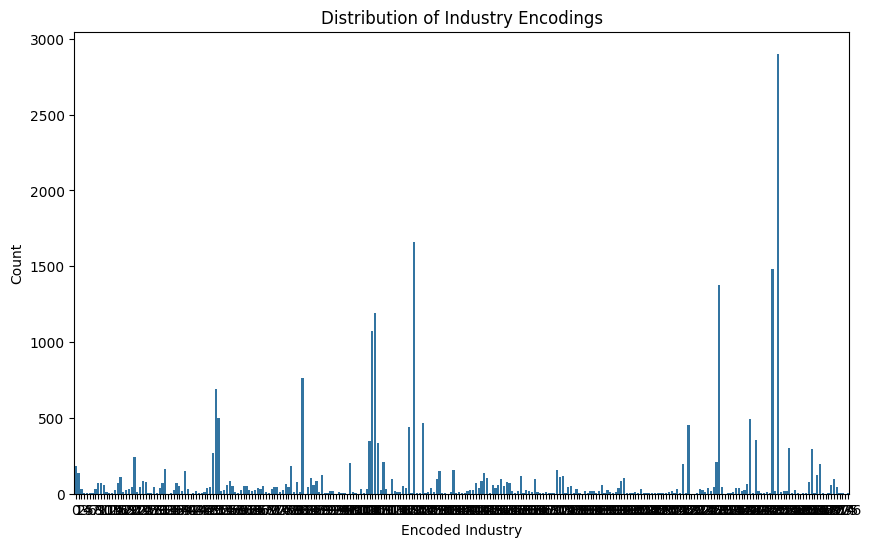

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=df['industry_encoded'])
plt.title('Distribution of Industry Encodings')
plt.xlabel('Encoded Industry')
plt.ylabel('Count')
plt.show()

**TF-IDF Features**

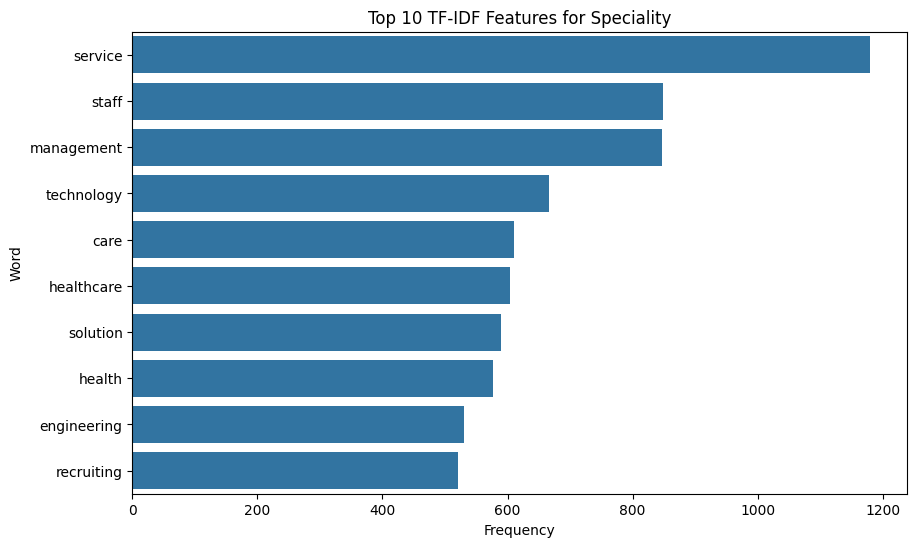

In [ ]:
# Example: Visualizing the top TF-IDF features for 'speciality'
tfidf_spec.fit(df['speciality'])
features = tfidf_spec.get_feature_names_out()
tfidf_matrix = tfidf_spec.transform(df['speciality'])
sum_words = tfidf_matrix.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_spec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_words = words_freq[:10]

# Plot
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df)
plt.title('Top 10 TF-IDF Features for Speciality')
plt.show()


**Performances**

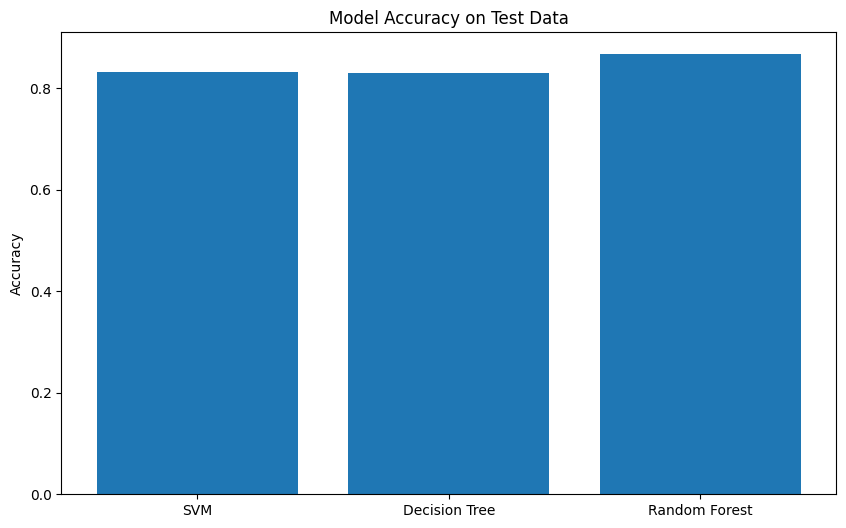

In [ ]:
accuracies = {
    'SVM': accuracy_svm_final,
    'Decision Tree': accuracy_decisionTree_final,
    'Random Forest': accuracy_randomForest_final
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy on Test Data')
plt.ylabel('Accuracy')
plt.show()


**Confusion Matrices for each Model to Understand their Performances**

- SVM

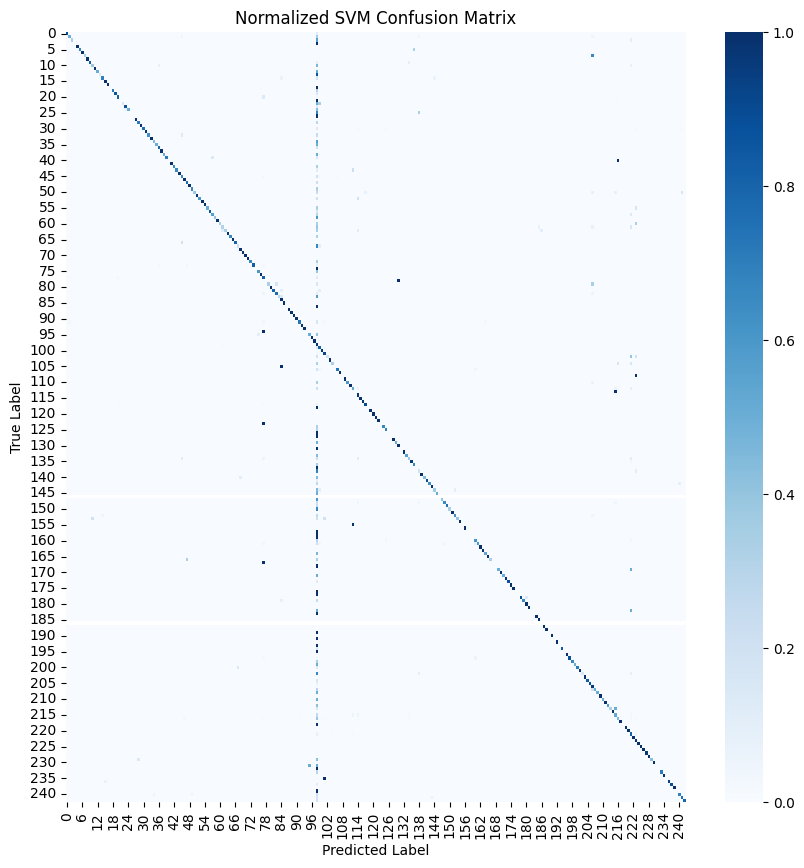

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have y_test and y_pred
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues', cbar=True, ax=ax)

# Improve readability
plt.title('Normalized SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


* Decision Tree

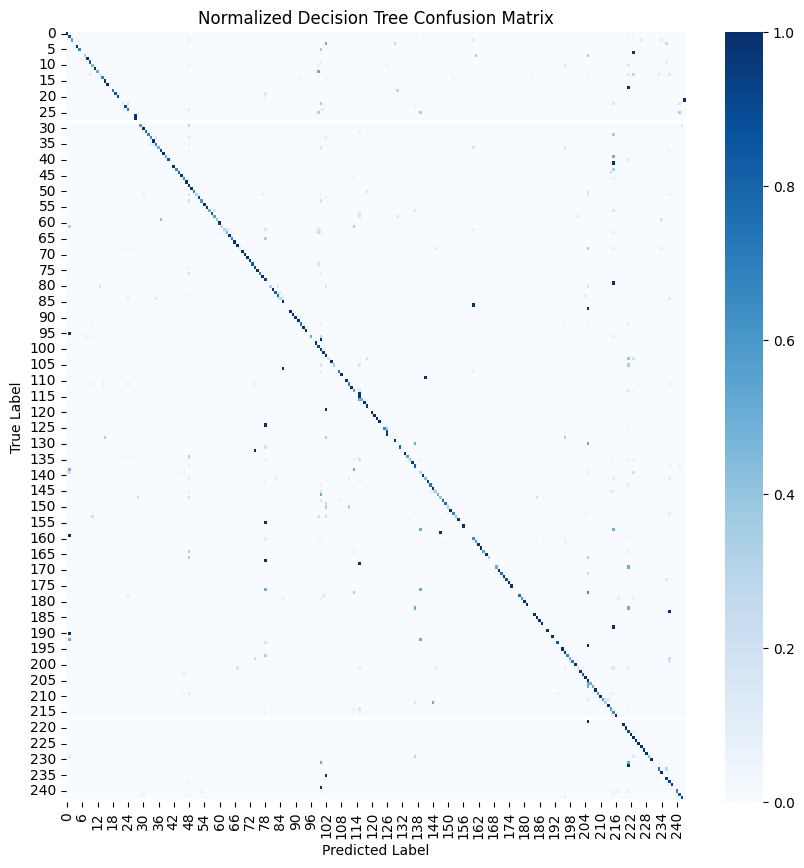

In [ ]:
# Assuming you have y_test and y_pred
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_decisionTree)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues', cbar=True, ax=ax)

# Improve readability
plt.title('Normalized Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


* Random Forest

In [ ]:
# Assuming you have y_test and y_pred
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_randomForest)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues', cbar=True, ax=ax)

# Improve readability
plt.title('Normalized RandomForest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


NameError: name 'y_pred_randomForest' is not defined

**Precision, Recall, and F1 Scores**

In [ ]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\n")


**Decision Tree and Random Forest - Feature Importances**

In [ ]:
importances = randomForest_model.named_steps['classifier'].feature_importances_
features = tfidf_spec.get_feature_names_out() + tfidf_skill.get_feature_names_out() + ['company_size']

# Create DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 10 Feature Importances in Random Forest')
plt.show()


**Voting Classifier Performances**

In [ ]:
ensemble_scores_mean = np.mean(ensemble_scores)
ensemble_scores_std = np.std(ensemble_scores)

plt.figure(figsize=(10, 6))
models = ['SVM', 'Decision Tree', 'Random Forest', 'Ensemble']
scores_means = [np.mean(svm_scores), np.mean(dt_scores), np.mean(rf_scores), ensemble_scores_mean]
scores_stds = [np.std(svm_scores), np.std(dt_scores), np.std(rf_scores), ensemble_scores_std]

sns.barplot(x=models, y=scores_means, yerr=scores_stds)
plt.title('Model Comparison with Ensemble')
plt.ylabel('Cross-Validation Accuracy')
plt.show()


=> These cover various aspects of pipeline, from data preprocessing to model performance evalutions.<br><br>
*Giving a Comprehensive Understanding of how the models are performing and what Factors might affect their Predictions*